In [26]:
#import Pkg; Pkg.add("MLDatasets")
#import Pkg; Pkg.add("Images")
#import Pkg; Pkg.add("TestImages")

using MLDatasets
using Images
using TestImages
using Plots

In [27]:
train_x, train_y = MNIST.traindata()
test_x, test_y   = MNIST.testdata();

In [28]:
size(train_x)

(28, 28, 60000)

In [29]:
train_x[:,:,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

In [30]:
train_y

60000-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [31]:
#using ImageIO
#using QuartzImageIO
#using ImageMagick

First  image in train dataset is 5


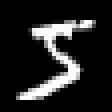

In [32]:
println("First  image in train dataset is ", train_y[1])
colorview(Gray, train_x[:,:,1]')

In [33]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:,:,i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end

train_data = [x for x in zip(X,Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:,:,i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end

test_data = [x for x in zip(X,Y)];

In [34]:
#Define the activation function and its derivative
σ(x)  = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x)*(1-σ(x))

dσ (generic function with 1 method)

In [35]:
#Define a Neural Network Type
mutable struct neural_network
    W
    b
end

In [36]:
function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    W = [[0,0], randn(hidden_layer_sizes[1] , input_layer_size)]
    
    b = [[0,0], randn(hidden_layer_sizes[1])]
    
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
        push!(b, randn(hidden_layer_sizes[i]))
    end
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W, b)
end

create_network (generic function with 1 method)

In [37]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array[[0, 0], [-0.2673229257591565 -0.0364501066999403 … 0.4632866340597376 -1.8751448856085138; 2.172667446822405 -0.596387810832832 … 1.7205181681163757 2.021552016015562; … ; 2.112598186031216 0.8395291046454053 … 0.7703306392792831 0.11616240916712055; -0.21512438902938738 1.5173102970015877 … 0.636635976323525 -0.3071695833647107], [-1.214340909627728 0.30410866559360933 … -0.7450852956924492 1.0273536100359988; -2.2745214424805256 0.26508667121051593 … -2.174952768341005 -2.1671701247556276; … ; 1.2172388534925898 -0.8487810685684767 … -1.8954191261053281 -0.2546695046960511; -0.5731087462524063 0.7299819140090769 … 0.36028246257479896 0.39551444839066385], [0.7131040651357895 -1.9960829990929838 … -0.8274749038823302 -2.0076649231862187; -0.07064652946115815 1.6007647248643808 … -2.009942695321376 -0.8446929713876721; … ; 0.6826443602252319 -1.5483958484074662 … 1.0176734338328368 0.09217955316182633; -0.11744125390163127 1.0840030106840433 … 0.08416195868450044 1

In [38]:
NN.b

5-element Array{Array{Float64,1},1}:
 [0.0, 0.0]
 [0.41231084562352227, 1.3404463458238889, 1.0212918482488456, 0.9799151754685862, -0.5893306109289548, 0.07488314831157035, -0.8723238984215661, -0.40901152691686593, 0.02319213326047977, 0.2373638892965808  …  1.3835550232338363, 0.47710488169970283, 0.6511779974043442, 1.2843711736997698, 1.6862405703562893, -0.007427345777294213, -1.8674223763060587, -0.5614384048619402, -0.3850140104304142, 1.294384737785372]
 [0.14327043698297898, -1.999678547936919, 1.6219588272635819, 0.7226564816679926, -0.24792252816939736, -0.06472368313663991, -0.2857179467531037, 0.2393494902991199, 1.8509523660808405, 0.29514136593193036  …  0.1922454248042344, -0.2837371086259368, -0.69578919550974, -0.4838752977500409, 1.1985297356652571, -0.4402794767911769, -0.7327334883468682, -0.8596255939442544, -1.525361699494538, -1.269100745506392]
 [0.521027098210517, -1.3981181631017658, 0.7018303846765892, -0.051326631285709495, 0.4706279469895631, -0.908900466

In [39]:
for w in NN.W
    println(size(w))
    println("")
end

(2,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



In [40]:
function forward_pass(network, training_instance)
    Z = [[0.0]]
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i] * A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    
    return Z,A
end

forward_pass (generic function with 1 method)

In [41]:
function predict(network, training_instance)
    Z,A = forward_pass(network, training_instance)
    return argmax(A[end]) - 1 
end

predict (generic function with 1 method)

In [42]:
function success_percentage(network, data_set)
    return string("The percentage of correctly classified images is: ", sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)*100.,"%")
end

success_percentage (generic function with 1 method)

In [43]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 10.89%"

In [44]:
function error_deltas(network, training_instance)
    L     = size(network.W)[1]
    Z, A  = forward_pass(network, training_instance)
    δ     = [(A[end] - training_instance[2]).*dσ.(Z[end])]
    
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end
    
    pushfirst!(δ, [0.0])
    return A, δ
end

error_deltas (generic function with 1 method)

In [45]:
A_test, δ_test = error_deltas(NN, train_data[1]);

In [46]:
δ_test[end]

10-element Array{Float64,1}:
 1.555879214530571e-5
 0.00020458277975854707
 0.1326998919536647
 1.2486180448460696e-5
 0.0
 0.0
 0.0009420272323354202
 0.0
 0.0021493109582449094
 0.0014626453859646

In [47]:
#Gradient Descent
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:length(data_set)-mini_batch_size)
    return data_set[k:k+mini_batch_size]
end

make_random_mini_batch (generic function with 1 method)

In [55]:
#Mini batch update
function mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)
    mini_batch = make_random_mini_batch(mini_batch_size, data_set)
    L          = size(network.W)[1]
    
    A, δ    = error_deltas(NN, mini_batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ  = error_deltas(network, mini_batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -=(α/mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1: mini_batch_size])
        network.b[l] -=(α/mini_batch_size)*sum([δ_batch[i][l] for i = 1: mini_batch_size])
    end
end

mini_batch_update! (generic function with 1 method)

In [93]:
for _ = 1:60000
    mini_batch_update!(NN, 7, train_data, 0.4)
end

In [94]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 86.18%"

In [61]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

show_test_img (generic function with 1 method)

In [65]:
function show_test_example(network::neural_network, i::Int64, testing_data)
    println("Predicted Label: ", predict(network, testing_data[i]))
    println("Actual Label: ", argmax(testing_data[i][2])-1)
    show_test_img(i)
end

show_test_example (generic function with 1 method)

Predicted Label: 3
Actual Label: 7


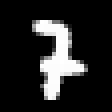

In [72]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 8
Actual Label: 3


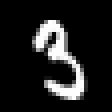

In [83]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 9
Actual Label: 9


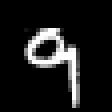

In [74]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 7
Actual Label: 7


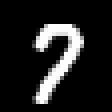

In [75]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 9
Actual Label: 9


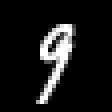

In [86]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 5
Actual Label: 5


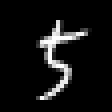

In [87]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 0
Actual Label: 4


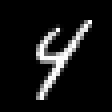

In [88]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 9
Actual Label: 4


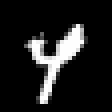

In [89]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 1
Actual Label: 1


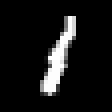

In [90]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 7
Actual Label: 7


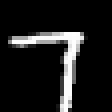

In [92]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)